In [0]:
#Create session and read dataset

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Clustering using K-Means').getOrCreate()

In [0]:
def readdf(file):
  df = spark.read.csv(file, sep = ' ', inferSchema = True)

  #Drop Nan values
  df=df.na.drop()
  
  return df  

In [0]:
file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject101.dat'
df1 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject102.dat'
df2 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject103.dat'
df3 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject104.dat'
df4 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject105.dat'
df5 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject106.dat'
df6 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject107.dat'
df7 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject108.dat'
df8 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject109.dat'
df9 = readdf(file)

In [0]:
#Creation of a unique dataframe
DF = df1.union(df2).union(df3).union(df4).union(df5).union(df6).union(df7).union(df8).union(df9)

In [0]:
#Select walking activity only
DF = df.filter(df._c1.isin(4))

In [0]:
HR = DF.select('_c2') #select Heart Rate
IMU = DF.select('_c20') #select Temperature values for chest
Time = DF.select('_c0') #select Time

(2) IMU CHEST ANALYSIS

In [0]:
X = Time.rdd.flatMap(lambda x: x).collect()
Y = IMU.rdd.flatMap(lambda x: x).collect()

In [0]:
from pyspark.ml.feature import VectorAssembler
#Assembling Vector
assemble=VectorAssembler(inputCols=['_c20'],outputCol='features')
assembled_data=assemble.transform(IMU)

In [0]:
#Clustering for IMU
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(assembled_data)
    
    output=KMeans_fit.transform(assembled_data)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)     

Silhouette Score: 0.7075700255584729
Silhouette Score: 0.8230916200606936
Silhouette Score: 0.8589640035620041
Silhouette Score: 0.838228822023728
Silhouette Score: 0.7991105019589988
Silhouette Score: 0.82291069340518
Silhouette Score: 0.7114659975009722
Silhouette Score: 0.7999024769851888


Out[10]: Text(0, 0.5, 'Average Silhouette Score')

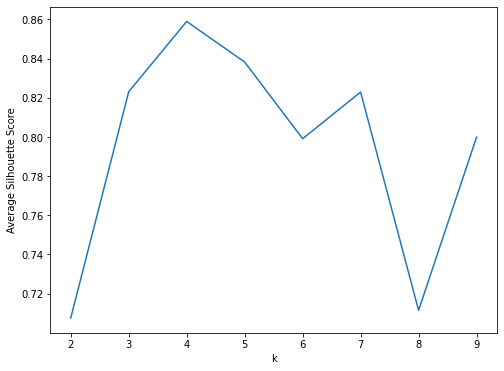

In [0]:
#(1) Plot silhouette scores 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('Average Silhouette Score')

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[11]: Text(0, 0.5, 'IMU chest temperature [°C]')

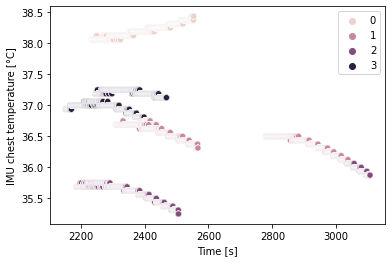

In [0]:
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
YY = np.asarray(Y).reshape(-1, 1)
KMean= KMeans(n_clusters=4)
KMean.fit(YY)
label=KMean.predict(YY)

#(2) Plot Clusters Labelled
p = sns.scatterplot(X,Y,hue=label)
p.set_xlabel('Time [s]') 
p.set_ylabel('IMU chest temperature [°C]') 